In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ejercicio 3

## Creamos una clase que permita simular llamadas a un Web Service

In [2]:
class WebServiceSim:
    
    def simularDosDB(self, n, media_llamadas, media_demora_db1, media_demora_db2, p_db1):
        if p_db1 > 1:
            raise Exception('La probabilidad p debe ser menor o igual a 1')
            
        return self._simularLlamadas(n, media_llamadas, media_demora_db1, media_demora_db2, p_db1)
    
    def simularUnaDB(self, n, media_llamadas, media_demora_db):
        return self._simularLlamadas(n, media_llamadas, media_demora_db)
    
    def _simularLlamadas(self, n, media_llamadas, media_atencion_db1, media_atencion_db2 = None, p_db1 = 1):
        '''
        Simula llamadas a servidores que serán atendidas por una o dos bases de datos.
        Si no se indica el parametro "media_atencion_db2" se usa una sola base de datos.
        Si se indica el parametro, se puede indicar la probabilidad "p" que determina la 
            probabilidad de que una llamada sea atendida por la base de datos 1. Y "1-p"
            será la probabilidad de que sea atendida por la base de datos 2.
        '''
        t_actual = 0
        t_espera_acumulado = 0
        t_libre_acumulado = 0
        llamados_sin_esperar = 0

        llamadas = np.random.exponential(media_llamadas, n).cumsum()

        for i in range(n):
            t_llamada_i = llamadas[i]
            t_espera_i = t_actual - t_llamada_i

            if t_espera_i > 0: # tuvo que esperar
                t_espera_acumulado += t_espera_i

            else: # no hay espera, el sistema estuvo libre
                t_libre_acumulado += -1*t_espera_i
                llamados_sin_esperar += 1

            if p_db1 != 1:
                t_demora = self._calcularDemoraConDosDB(media_atencion_db1, media_atencion_db2, p_db1)
            else:
                t_demora = np.random.exponential(media_atencion_db1)

            t_actual = t_llamada_i + t_demora

        ret = {
            'espera_total': t_espera_acumulado,
            'espera_total_promedio': t_espera_acumulado / n,
            'libre_total':  t_libre_acumulado,
            'libre_total_promedio': t_libre_acumulado / n,
            'sin_esperar': llamados_sin_esperar,
            'sin_esperar_probabilidad': llamados_sin_esperar / n
        }

        return ret 
    
    def _calcularDemoraConDosDB(self, media_atencion_db1, media_atencion_db2, p_db1):
        u = np.random.random()
        if u < p_db1:
            return np.random.exponential(media_atencion_db1) 
        else:
            return np.random.exponential(media_atencion_db2) 

### Simulamos los dos casos propuestos por el ejercicio

In [3]:
sim = WebServiceSim()
simulacion_alternativa1 = sim.simularDosDB(100_000, 4, 0.7, 1, 0.7)
simulacion_alternativa2 = sim.simularUnaDB(100_000, 4, 0.8)

### Con los resultados graficamos y constrastamos las dos alternativas

Text(0, 0.5, 'Tiempo promedio en segundos')

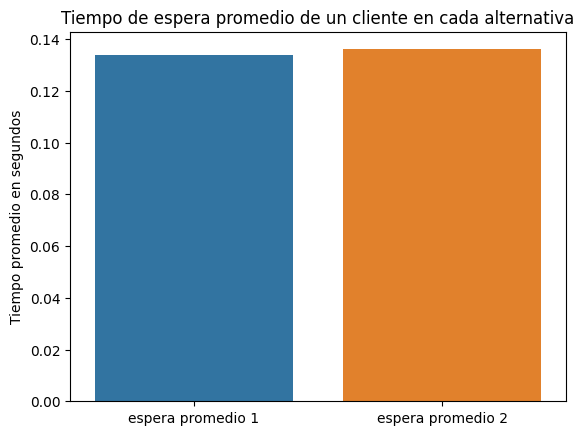

In [4]:
esperas = [
    simulacion_alternativa1['espera_total_promedio'],
    simulacion_alternativa2['espera_total_promedio']
]
grf = sns.barplot(x=['espera promedio 1','espera promedio 2'], y=esperas)
grf.set_title('Tiempo de espera promedio de un cliente en cada alternativa')
grf.set_ylabel('Tiempo promedio en segundos')

Text(0, 0.5, 'Tiempo promedio en segundos')

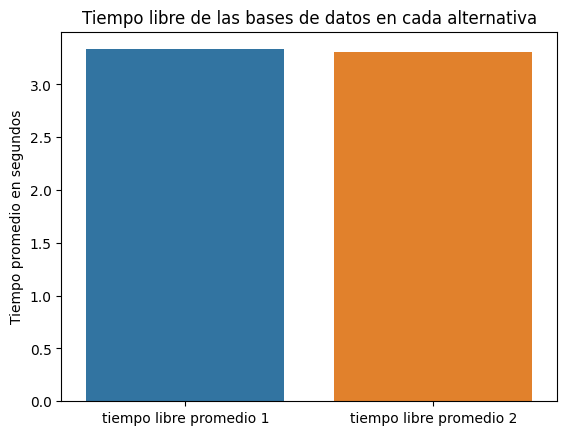

In [5]:
libre = [
    simulacion_alternativa1['libre_total_promedio'],
    simulacion_alternativa2['libre_total_promedio']
]
grf = sns.barplot(x=['tiempo libre promedio 1','tiempo libre promedio 2'], y=libre)
grf.set_title('Tiempo libre de las bases de datos en cada alternativa')
grf.set_ylabel('Tiempo promedio en segundos')

Text(0, 0.5, 'Proporción de clientes sobre el total')

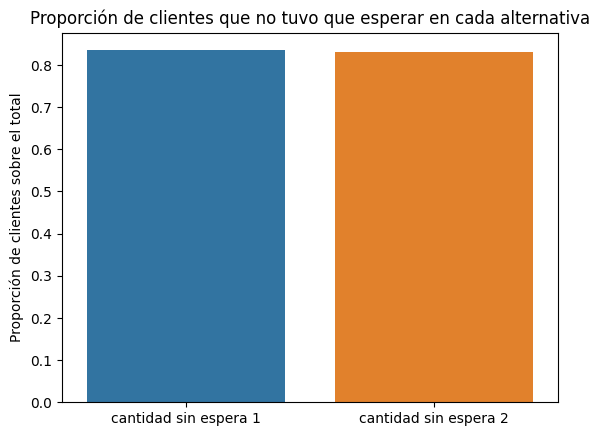

In [6]:
sin_espera = [
    simulacion_alternativa1['sin_esperar_probabilidad'],
    simulacion_alternativa2['sin_esperar_probabilidad']
]
grf = sns.barplot(x=['cantidad sin espera 1','cantidad sin espera 2'], y=sin_espera)
grf.set_title('Proporción de clientes que no tuvo que esperar en cada alternativa')
grf.set_ylabel('Proporción de clientes sobre el total')

Analizando los resultados podemos pensar que las alternativas tienen resultados similares, no notamos que en un caso una sea mucho mejor que otra.

## Realizamos otras simulaciones variando parámetros (uno a la vez)

Para cada variación, los mejores resultados serán aquellos que tengan el menor tiempo de espera promedio y la mayor proporción de llamadas que no esperaron en ser atendidas.

### Para la alternativa 1

#### Variamos p

In [7]:
sim = WebServiceSim()
valores_p = np.linspace(0.01, 0.99, 50)
espera = []
sin_esperar = []
for p in valores_p:
    res = sim.simularDosDB(20_000, 4, 0.7, 1, p)
    espera.append(res['espera_total_promedio'])
    sin_esperar.append(res['sin_esperar_probabilidad'])

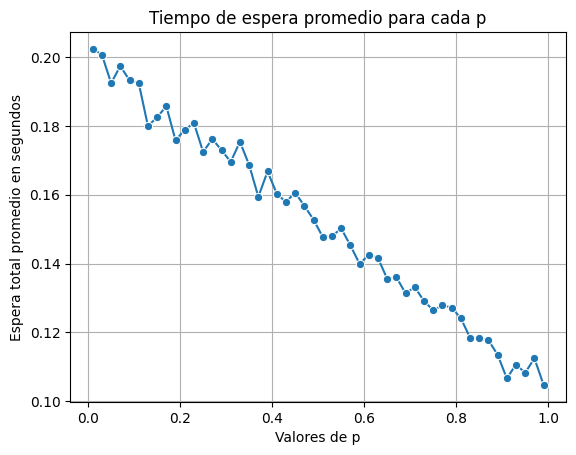

In [8]:
sns.lineplot(x=valores_p, y=espera, marker='o')
plt.grid()
plt.title('Tiempo de espera promedio para cada p')
plt.ylabel('Espera total promedio en segundos')
plt.xlabel('Valores de p')
plt.show()

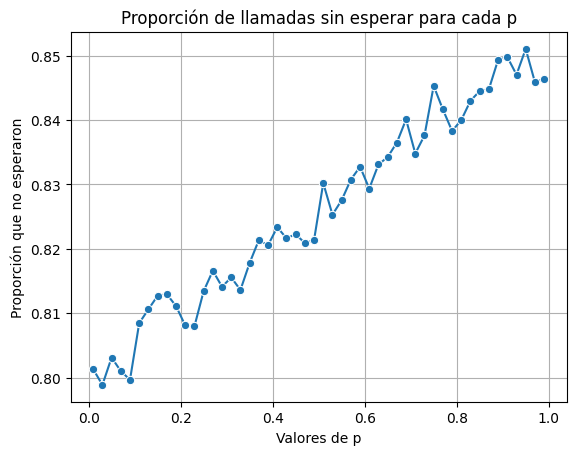

In [9]:
sns.lineplot(x=valores_p, y=sin_esperar, marker='o')
plt.grid()
plt.title('Proporción de llamadas sin esperar para cada p')
plt.ylabel('Proporción que no esperaron')
plt.xlabel('Valores de p')
plt.show()

#### Variamos la media de llamadas de la base de datos 2

In [10]:
medias_db2 = np.linspace(0.2, 1, 50)
espera = []
sin_esperar = []
for mu in medias_db2:
    res = sim.simularDosDB(20_000, 4, 0.7, mu, 0.7)
    espera.append(res['espera_total_promedio'])
    sin_esperar.append(res['sin_esperar_probabilidad'])

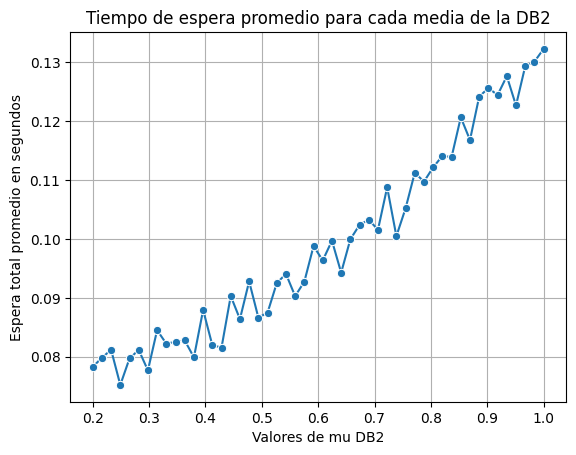

In [11]:
sns.lineplot(x=medias_db2, y=espera, marker='o')
plt.grid()
plt.title('Tiempo de espera promedio para cada media de la DB2')
plt.ylabel('Espera total promedio en segundos')
plt.xlabel('Valores de mu DB2')
plt.show()

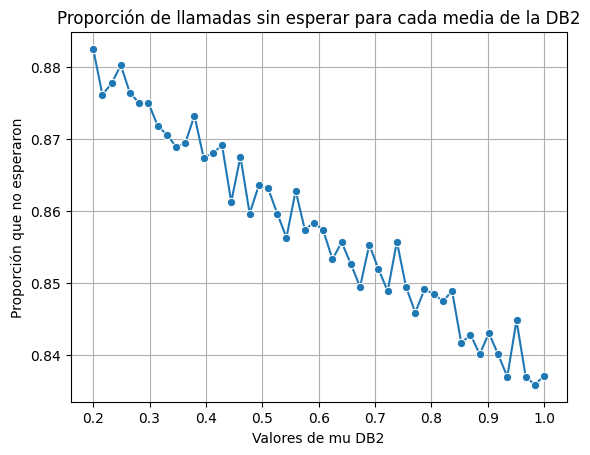

In [12]:
sns.lineplot(x=medias_db2, y=sin_esperar, marker='o')
plt.grid()
plt.title('Proporción de llamadas sin esperar para cada media de la DB2')
plt.ylabel('Proporción que no esperaron')
plt.xlabel('Valores de mu DB2')
plt.show()

### Para la alternativa 1

#### Variamos la media de llamadas

In [13]:
medias_llamadas = np.linspace(1, 7, 50)
espera = []
sin_esperar = []
for mu in medias_llamadas:
    res = sim.simularUnaDB(20_000, mu, 0.8)
    espera.append(res['espera_total_promedio'])
    sin_esperar.append(res['sin_esperar_probabilidad'])

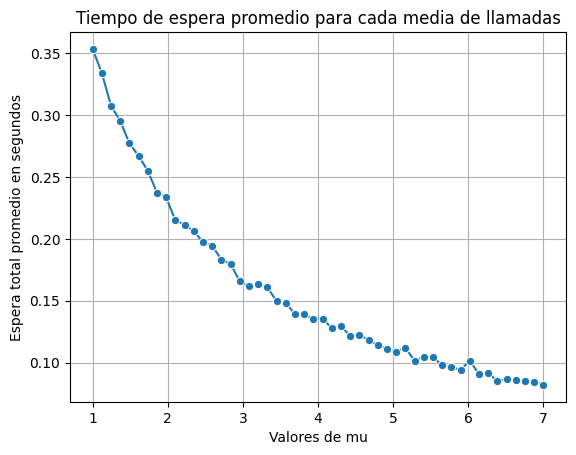

In [14]:
sns.lineplot(x=medias_llamadas, y=espera, marker='o')
plt.grid()
plt.title('Tiempo de espera promedio para cada media de llamadas')
plt.ylabel('Espera total promedio en segundos')
plt.xlabel('Valores de mu')
plt.show()

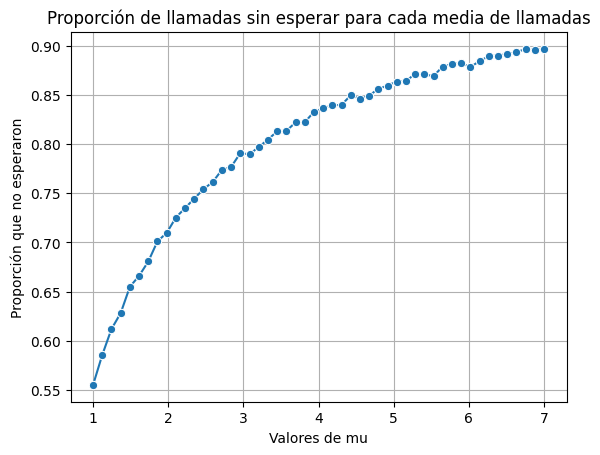

In [15]:
sns.lineplot(x=medias_llamadas, y=sin_esperar, marker='o')
plt.grid()
plt.title('Proporción de llamadas sin esperar para cada media de llamadas')
plt.ylabel('Proporción que no esperaron')
plt.xlabel('Valores de mu')
plt.show()

#### Variamos la media de atencion de la DB

In [16]:
medias_db = np.linspace(0.5, 4, 50)
espera = []
sin_esperar = []
for mu in medias_db:
    res = sim.simularUnaDB(20_000, 4, mu)
    espera.append(res['espera_total_promedio'])
    sin_esperar.append(res['sin_esperar_probabilidad'])

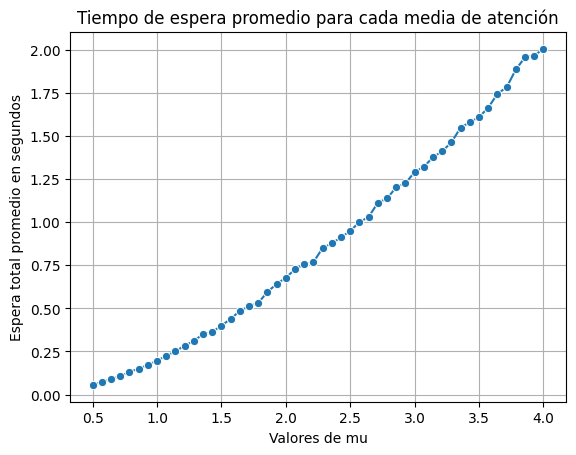

In [17]:
sns.lineplot(x=medias_db, y=espera, marker='o')
plt.grid()
plt.title('Tiempo de espera promedio para cada media de atención')
plt.ylabel('Espera total promedio en segundos')
plt.xlabel('Valores de mu')
plt.show()

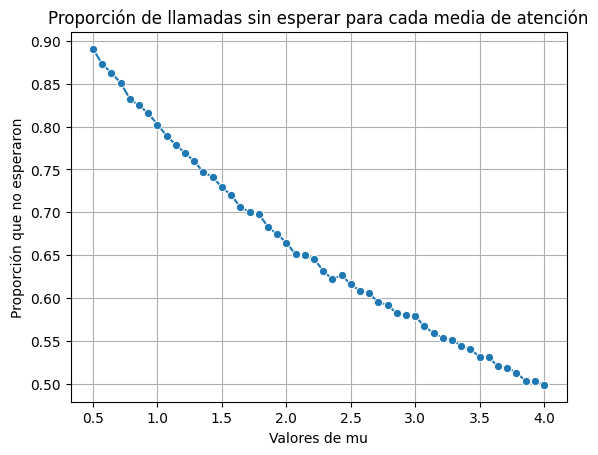

In [18]:
sns.lineplot(x=medias_db, y=sin_esperar, marker='o')
plt.grid()
plt.title('Proporción de llamadas sin esperar para cada media de atención')
plt.ylabel('Proporción que no esperaron')
plt.xlabel('Valores de mu')
plt.show()